## Necessary Module Importation

In [263]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from dotenv import dotenv_values
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import gdown
import logging
import pyodbc
import datetime as dt
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Storage

In [264]:
Holidays_Data = pd.read_csv('C:\\Users\\USER\\Downloads\\holiday_data.csv')
Holidays_Data.head()

,Unnamed: 0,date,type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [265]:
Holidays_Data.to_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\Holidays_Data.csv', index=False)
Holidays_Data = pd.read_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\Holidays_Data.csv')
Holidays_Data.head()

,Unnamed: 0,date,type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [266]:
oil_data = pd.read_csv('C:\\Users\\USER\\Downloads\\oil_data.csv')
oil_data.to_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\oil_data.csv', index=False)
oil_data = pd.read_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\oil_data.csv')
oil_data.head()

,Unnamed: 0,date,dcoilwtico
0,0,2013-01-01,NaN
1,1,2013-01-02,93.139999
2,2,2013-01-03,92.970001
3,3,2013-01-04,93.120003
4,4,2013-01-07,93.199997


In [267]:
stores_data = pd.read_csv('C:\\Users\\USER\\Downloads\\stores_data.csv')
stores_data.to_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\stores_data.csv', index=False)
stores_data = pd.read_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\stores_data.csv')
stores_data.head()

,Unnamed: 0,store_nbr,city,state,type,cluster
0,0,1,Quito,Pichincha,D,13
1,1,2,Quito,Pichincha,D,13
2,2,3,Quito,Pichincha,D,8
3,3,4,Quito,Pichincha,D,9
4,4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [268]:
test_data = pd.read_csv('C:\\Users\\USER\\Downloads\\test.csv')
test_data.to_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\test_data.csv', index=False)
test_data = pd.read_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\test_data.csv')
test_data.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [269]:
train_data = pd.read_csv('C:\\Users\\USER\\Downloads\\train_data.csv')
train_data.to_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\train_data.csv', index=False)
train_data = pd.read_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\train_data.csv')
train_data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [270]:
Transactions_Data = pd.read_csv('C:\\Users\\USER\\Downloads\\transactions.csv')
Transactions_Data.to_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\Transactions_Data.csv', index=False)
Transactions_Data = pd.read_csv('C:\\Users\\USER\\.vscode\\Data_Science_Projects\\Data_Science_Projects\\Data\\Transactions_Data.csv')
Transactions_Data.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


## Data Cleaning and Exploration

In [271]:
Holidays_Data

,Unnamed: 0,date,type,locale,locale_name,description,transferred
0,0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...,...
345,345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [272]:
Holidays_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   350 non-null    int64 
 1   date         350 non-null    object
 2   type         350 non-null    object
 3   locale       350 non-null    object
 4   locale_name  350 non-null    object
 5   description  350 non-null    object
 6   transferred  350 non-null    bool  
dtypes: bool(1), int64(1), object(5)
memory usage: 16.9+ KB


Date column is in 'Object' format

In [273]:
Holidays_Data.describe()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


In [274]:
Holidays_Data.isnull().sum()

Unnamed: 0     0
date           0
type           0
locale         0
locale_name    0
description    0
transferred    0
dtype: int64

In [275]:
Holidays_Data.duplicated().sum()

0

In [276]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


Date column is in 'Object' format

In [277]:
test_data.describe()

,id,store_nbr,onpromotion
count,2.851200e+04,28512.000000,28512.000000
mean,3.015144e+06,27.500000,6.965383
std,8.230850e+03,15.586057,20.683952
min,3.000888e+06,1.000000,0.000000
25%,3.008016e+06,14.000000,0.000000
50%,3.015144e+06,27.500000,0.000000
75%,3.022271e+06,41.000000,6.000000
max,3.029399e+06,54.000000,646.000000


In [278]:
test_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
onpromotion    0
dtype: int64

In [279]:
test_data.duplicated().sum()

0

In [280]:
Transactions_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83488 entries, 0 to 83487
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          83488 non-null  object
 1   store_nbr     83488 non-null  int64 
 2   transactions  83488 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ MB


Date column is in 'Object' format

In [281]:
Transactions_Data.describe()

,store_nbr,transactions
count,83488.000000,83488.000000
mean,26.939237,1694.602158
std,15.608204,963.286644
min,1.000000,5.000000
25%,13.000000,1046.000000
50%,27.000000,1393.000000
75%,40.000000,2079.000000
max,54.000000,8359.000000


In [282]:
Transactions_Data.isnull().sum()

date            0
store_nbr       0
transactions    0
dtype: int64

In [283]:
Transactions_Data.duplicated().sum()

0

In [284]:
oil_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1218 entries, 0 to 1217
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1218 non-null   int64  
 1   date        1218 non-null   object 
 2   dcoilwtico  1175 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 28.7+ KB


Date column is in 'Object' format

In [285]:
oil_data.isnull().sum()

Unnamed: 0     0
date           0
dcoilwtico    43
dtype: int64

In [286]:
oil_data.duplicated().sum()

0

In [287]:
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  54 non-null     int64 
 1   store_nbr   54 non-null     int64 
 2   city        54 non-null     object
 3   state       54 non-null     object
 4   type        54 non-null     object
 5   cluster     54 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.7+ KB


In [288]:
stores_data.describe()

,Unnamed: 0,store_nbr,cluster
count,54.000000,54.000000,54.000000
mean,26.500000,27.500000,8.481481
std,15.732133,15.732133,4.693395
min,0.000000,1.000000,1.000000
25%,13.250000,14.250000,4.000000
50%,26.500000,27.500000,8.500000
75%,39.750000,40.750000,13.000000
max,53.000000,54.000000,17.000000


In [289]:
stores_data.isnull().sum()

Unnamed: 0    0
store_nbr     0
city          0
state         0
type          0
cluster       0
dtype: int64

In [290]:
stores_data.duplicated().sum()

0

In [291]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


Date column is in 'Object' format

In [292]:
train_data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [293]:
train_data.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
dtype: int64

In [294]:
train_data.duplicated().sum()

0

#### Univariate Analysis

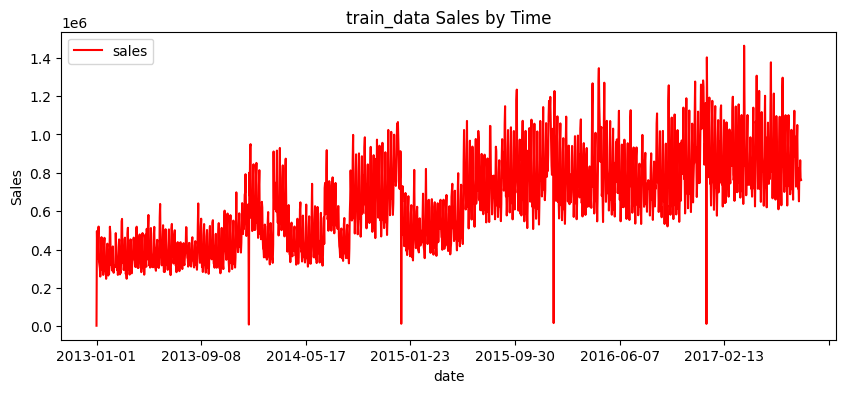

In [295]:
train_sales_by_time = train_data.groupby('date').sales.sum().reset_index()    
train_sales_by_time = train_sales_by_time.set_index('date')

train_sales_by_time.plot(figsize = (10,4), color= ('red'))
plt.title('train_data Sales by Time')
plt.ylabel('Sales')
plt.show()

The train_data plot demonstrates a consistent upward trend in sales as we move towards the right.

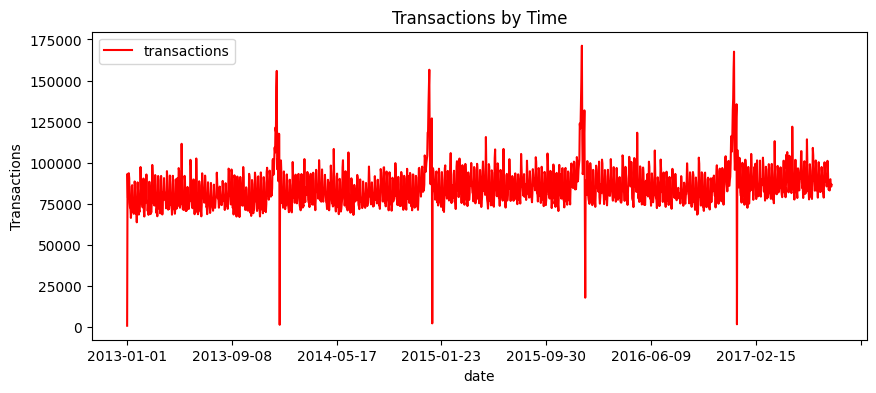

In [296]:
transaction_sum_by_time = Transactions_Data.groupby('date').transactions.sum().reset_index()
transaction_sum_by_time = transaction_sum_by_time.set_index('date')

transaction_sum_by_time.plot(figsize = (10,4), color= ('red'))
plt.title('Transactions by Time')
plt.ylabel('Transactions')
plt.show()

A clear observation reveals a consistent rise in yearly transactions towards the right, with 2016 standing out as the year with the highest sales records. However, the month-to-month records indicate relatively stable transaction levels over the recorded years. The only exceptions are the year-end periods, where sharp increases in transactions occur, indicating a seasonal pattern.

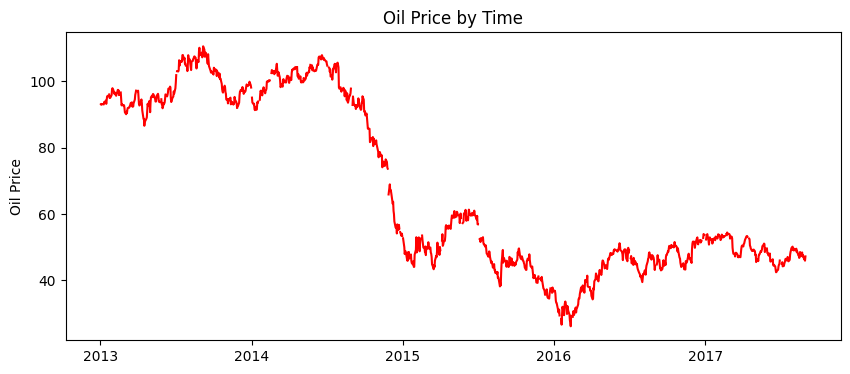

In [297]:
oil_data['date'] = pd.to_datetime(oil_data['date'])
dcoilwtico_by_time = oil_data.groupby('date')['dcoilwtico'].mean().reset_index()
dcoilwtico_by_time = dcoilwtico_by_time.set_index('date')

plt.figure(figsize=(10, 4))
plt.plot(dcoilwtico_by_time.index, dcoilwtico_by_time['dcoilwtico'], color='red')
plt.title('Oil Price by Time')
plt.ylabel('Oil Price')
plt.show()

The trend indicates a decrease in oil prices from 2015. Additionally, a noticeable disruption in the trend is attributed to the presence of missing or NaN values.

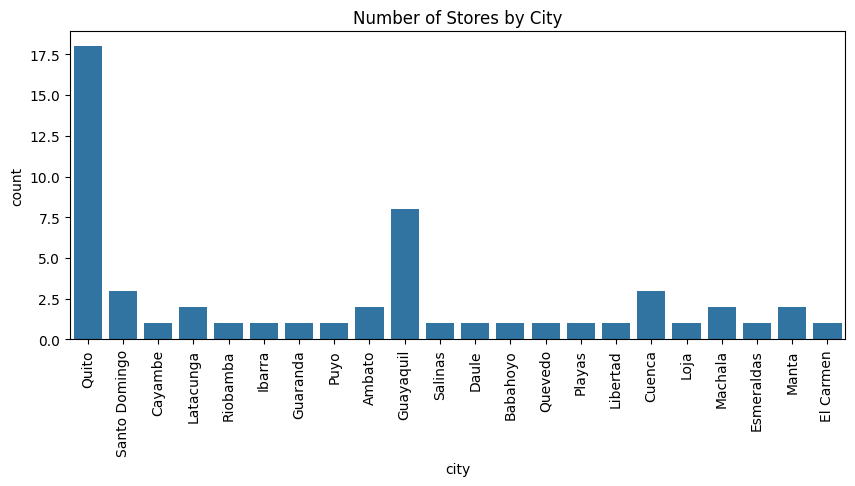

In [298]:
stores_data.set_index('store_nbr', inplace=True)
plt.figure(figsize=(10, 4))
sns.countplot(data=stores_data, x='city')
plt.xticks(rotation=90)
plt.title('Number of Stores by City')
plt.show()

The visual representation indicates that Quito and Guayaquil boast the highest store counts, while other cities maintain an average of one store per city.

#### Holidays investigation

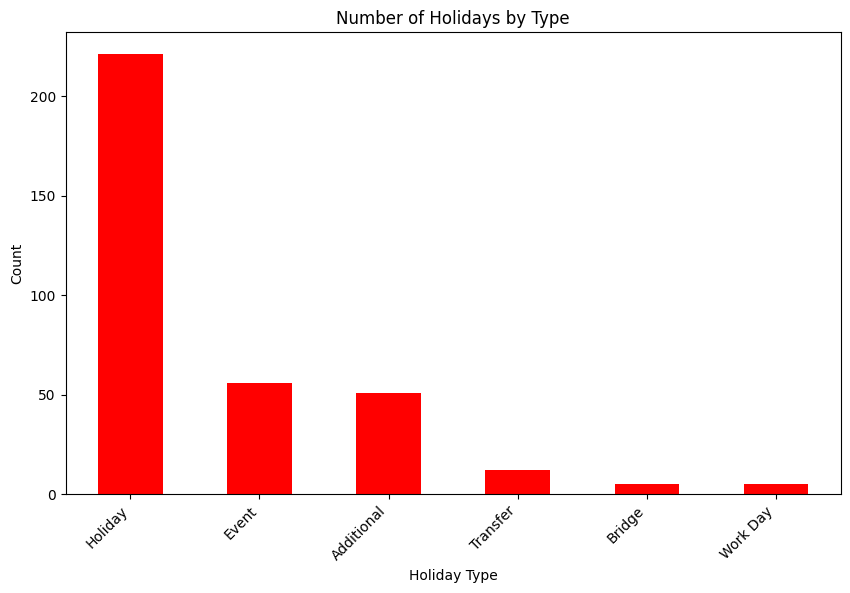

In [299]:
holiday_counts = Holidays_Data['type'].value_counts()

plt.figure(figsize=(10, 6))
holiday_counts.plot(kind='bar', color='red')
plt.title('Number of Holidays by Type')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


In [300]:
transferred_holidays = Holidays_Data[Holidays_Data['transferred'] == True][['date', 'transferred', 'type']]
observed_transferred_holidays = Holidays_Data[Holidays_Data.type == 'Transfer']
work_days_holidays = Holidays_Data[Holidays_Data.type == 'Work Day']    
additional_holidays = Holidays_Data[Holidays_Data.type == 'Additional']
bridge_holidays = Holidays_Data[Holidays_Data.type == 'Bridge']
national_holidays = Holidays_Data[Holidays_Data.type == 'National']
regional_holidays = Holidays_Data[Holidays_Data.type == 'Regional']
event_holidays = Holidays_Data[Holidays_Data.type == 'Event']



In [301]:

transferred_holidays

,date,transferred,type
19,2012-10-09,True,Holiday
72,2013-10-09,True,Holiday
135,2014-10-09,True,Holiday
255,2016-05-24,True,Holiday
266,2016-07-25,True,Holiday
268,2016-08-10,True,Holiday
297,2017-01-01,True,Holiday
303,2017-04-12,True,Holiday
312,2017-05-24,True,Holiday
324,2017-08-10,True,Holiday


In [302]:
observed_transferred_holidays

,Unnamed: 0,date,type,locale,locale_name,description,transferred
20,20,2012-10-12,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
73,73,2013-10-11,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
136,136,2014-10-10,Transfer,National,Ecuador,Traslado Independencia de Guayaquil,False
256,256,2016-05-27,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
265,265,2016-07-24,Transfer,Local,Guayaquil,Traslado Fundacion de Guayaquil,False
269,269,2016-08-12,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False
298,298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False
304,304,2017-04-13,Transfer,Local,Cuenca,Fundacion de Cuenca,False
313,313,2017-05-26,Transfer,National,Ecuador,Traslado Batalla de Pichincha,False
325,325,2017-08-11,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False


The above demonstrates the specific days on which the transferred holidays were observed.

In [303]:
work_days_holidays

,Unnamed: 0,date,type,locale,locale_name,description,transferred
42,42,2013-01-05,Work Day,National,Ecuador,Recupero puente Navidad,False
43,43,2013-01-12,Work Day,National,Ecuador,Recupero puente primer dia del ano,False
149,149,2014-12-20,Work Day,National,Ecuador,Recupero Puente Navidad,False
161,161,2015-01-10,Work Day,National,Ecuador,Recupero Puente Primer dia del ano,False
283,283,2016-11-12,Work Day,National,Ecuador,Recupero Puente Dia de Difuntos,False


In [304]:
additional_holidays

,Unnamed: 0,date,type,locale,locale_name,description,transferred
28,28,2012-12-05,Additional,Local,Quito,Fundacion de Quito-1,False
31,31,2012-12-21,Additional,National,Ecuador,Navidad-4,False
33,33,2012-12-22,Additional,National,Ecuador,Navidad-3,False
34,34,2012-12-23,Additional,National,Ecuador,Navidad-2,False
36,36,2012-12-24,Additional,National,Ecuador,Navidad-1,False
38,38,2012-12-26,Additional,National,Ecuador,Navidad+1,False
40,40,2012-12-31,Additional,National,Ecuador,Primer dia del ano-1,False
53,53,2013-05-11,Additional,National,Ecuador,Dia de la Madre-1,False
64,64,2013-07-24,Additional,Local,Guayaquil,Fundacion de Guayaquil-1,False
81,81,2013-12-05,Additional,Local,Quito,Fundacion de Quito-1,False


In [305]:
bridge_holidays


,Unnamed: 0,date,type,locale,locale_name,description,transferred
35,35,2012-12-24,Bridge,National,Ecuador,Puente Navidad,False
39,39,2012-12-31,Bridge,National,Ecuador,Puente Primer dia del ano,False
156,156,2014-12-26,Bridge,National,Ecuador,Puente Navidad,False
160,160,2015-01-02,Bridge,National,Ecuador,Puente Primer dia del ano,False
277,277,2016-11-04,Bridge,National,Ecuador,Puente Dia de Difuntos,False


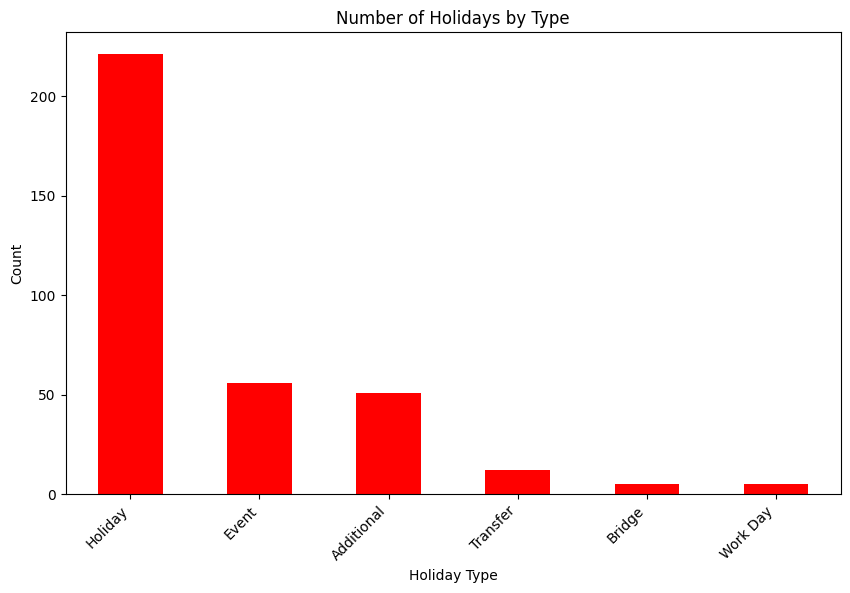

In [306]:
holiday_counts = Holidays_Data['type'].value_counts()

plt.figure(figsize=(10, 6))
holiday_counts.plot(kind='bar', color='red')
plt.title('Number of Holidays by Type')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()


#### Bivariate Analysis

Converting the date columns to date format

In [314]:
train_data['date'] = pd.to_datetime(train_data['date'])
oil_data['date'] = pd.to_datetime(oil_data['date'])
Transactions_Data['date'] = pd.to_datetime(Transactions_Data['date'])
Holidays_Data['date'] = pd.to_datetime(Holidays_Data['date'])
test_data['date'] = pd.to_datetime(test_data['date'])



Establishing the relationship between data sets

In [311]:
Sales_data = train_data.groupby('date').sales.sum().reset_index()

In [312]:
oil_sales_data = pd.merge(Sales_data, oil_data, on='date', how='left')
oil_sales_data = oil_sales_data.set_index('date')
oil_sales_data

,sales,Unnamed: 0,dcoilwtico
date,,,
2013-01-01,2511.618999,0.0,NaN
2013-01-02,496092.417944,1.0,93.139999
2013-01-03,361461.231124,2.0,92.970001
2013-01-04,354459.677093,3.0,93.120003
2013-01-05,477350.121229,NaN,NaN
...,...,...,...
2017-08-11,826373.722022,1203.0,48.810001
2017-08-12,792630.535079,NaN,NaN
2017-08-13,865639.677471,NaN,NaN


The missing values in the 'oil_sales' dataset will be filled using the seasonal component obtained from the decomposition because of the observation that the missing values share a similar seasonal pattern with the observed data as observed from the plots above.This seasonal imputation helps maintain the temporal structure of the data and allows for a more accurate representation of the time series.

In [322]:
from statsmodels.tsa.seasonal import seasonal_decompose

def seasonal_imputation(data):
    # Perform seasonal decomposition
    decomposition = seasonal_decompose(data['sales'], period=12)  # You may adjust the period based on your data
    
    # Use the seasonal component to fill missing values
    data['sales_imputed'] = data['sales'].fillna(decomposition.seasonal)
    
    return data

# Apply the placeholder seasonal_imputation function
oil_sales_data = seasonal_imputation(oil_sales_data)
print(oil_sales_data)


                    sales  Unnamed: 0  dcoilwtico  sales_imputed
date                                                            
2013-01-01    2511.618999         0.0   93.139999    2511.618999
2013-01-02  496092.417944         1.0   93.139999  496092.417944
2013-01-03  361461.231124         2.0   92.970001  361461.231124
2013-01-04  354459.677093         3.0   93.120003  354459.677093
2013-01-05  477350.121229         4.0   93.199997  477350.121229
...                   ...         ...         ...            ...
2017-08-11  826373.722022      1203.0   48.810001  826373.722022
2017-08-12  792630.535079      1204.0   47.590000  792630.535079
2017-08-13  865639.677471      1204.0   47.590000  865639.677471
2017-08-14  760922.406081      1204.0   47.590000  760922.406081
2017-08-15  762661.935939      1205.0   47.570000  762661.935939

[1684 rows x 4 columns]


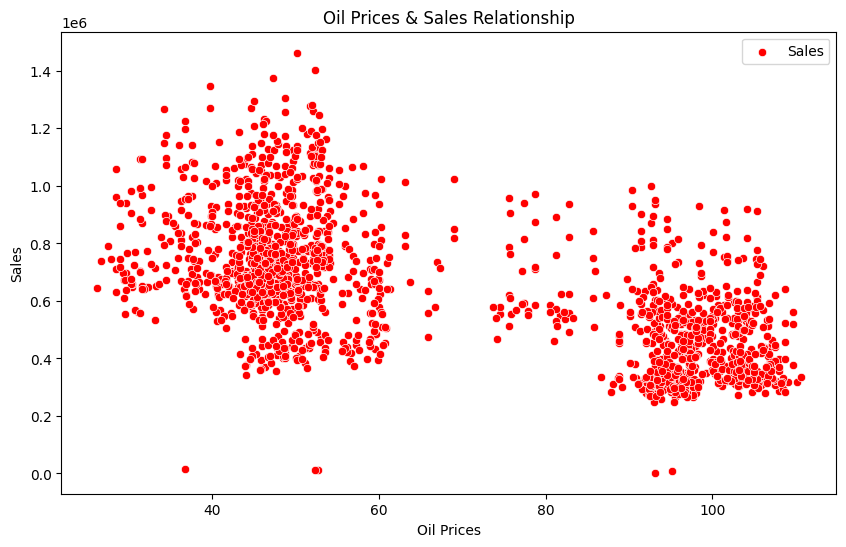

In [331]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=oil_sales_data['dcoilwtico'], y=oil_sales_data['sales_imputed'], color='red', label='Sales')
plt.title('Oil Prices & Sales Relationship')
plt.xlabel('Oil Prices')
plt.ylabel('Sales')
plt.legend()
plt.show()

It can be observed that there is a noticeable relationship between oil prices and sales. The plot shows that there are more sales when oil prices range between 40 and 60, and there is poor sales between 60 and 80, with a fairly stable observation between 80 and 100. The density of the dots illustrates this.